In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import statistics
import nltk
import re
from scipy import stats
from venn import venn
import matplotlib
import squarify
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords  
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize  
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\k\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [8]:
recipes = pd.read_csv('data/large_data/recipes.csv')
ingredient_freq = pd.read_csv('data/recipes/ingredient_freq.csv')
interactions = pd.read_csv('data/large_data/RAW_interactions.csv')

In [5]:
def calc_ingredient_ratings(ingredient_list, ingredient_freq= ingredient_freq):
    #print(ingredient_list) 
    rating = 0
    for ingredient in ingredient_list:
        try:
            freq = ingredient_freq.loc[ingredient]
        except:
            freq = 0
        rating += freq
    return rating

In [6]:
def get_recipes(search_phrase, recipes):
    recipe_list = recipes.loc[recipes['name'].str.contains(search_phrase, case=False)].copy()
    recipe_list['ingredient_score'] = recipe_list['mod_ingredients'].apply(calc_ingredient_ratings)
    recipe_list['overall_score'] = stats.zscore(recipe_list['minutes']) + recipe_list['avg_rating']*recipe_list['n_ratings'] + recipe_list['ingredient_score']*100 + stats.zscore(recipe_list['n_steps']) + stats.zscore(recipe_list['n_ingredients'])
    return recipe_list

In [7]:
def show_top_recipes(recipe_list):
    html = 'https://www.food.com/recipe/'
    common_ingredients = recipe_list['mod_ingredients'].apply(literal_eval).explode().value_counts()
    cmap = matplotlib.cm.Blues
    norm = matplotlib.colors.Normalize(vmin=min(common_ingredients), vmax=max(common_ingredients))
    colors = [cmap(norm(value)) for value in common_ingredients]
    squarify.plot(sizes=common_ingredients[:10], label=common_ingredients.index[:10], alpha=.5, text_kwargs={"wrap": True})
    plt.axis('off')
    plt.show()
    top_5 = recipe_list.nlargest(5, 'overall_score').copy()
    top_5['recipe_link'] = [f'https://www.food.com/recipe/{ing_id}' for ing_id in top_5['id']]
    return top_5[['name','id','overall_score','recipe_link']]

In [117]:
def make_wordcloud(recipe_list):
    stop_words = stopwords.words('english')
    stop_words.extend(['i','ive',"i've",'didnt','them', 'recipe', 'used','made'])
    stop_words = set(stop_words)
    #text = interactions[interactions['recipe_id'].isin(recipe_list.id)]['review'].apply(str.split).explode()
    #text = interactions[interactions['recipe_id'].isin(recipe_list.id)]['review'].apply(word_tokenize).explode()
    #text = [word.lower().translate(str.maketrans('', '', str.punctuation)) for word in text]
    #print(len(text))
    #text = [w.lower() for w in text if not w.lower() in stop_words]    
    #print(text[0:10])
    #text = [word for word in text if re.sub(r'[^\w\s]','', word) == word]
    #print(text[0:10])
    #print(len(text))
    #filtered_text = list(filter(lambda i:type(i) is str, text))
    #print(len(filtered_text))
    review_list = interactions[interactions['recipe_id'].isin(recipe_list.id)]['review']
    text = " ".join(review for review in review_list)
    wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [33]:
def main():
    search_phrase = input('Please enter your recipe: ')
    #search_words = search_phrase.split(" ")
    #search_words = "|".join("^{}$".format(word) for word in search_words)
    recipe_list = get_recipes(search_phrase, recipes)
    #print(recipe_list)
    #print(interactions[interactions['recipe_id'].isin(recipe_list.id)]['review'])
    make_wordcloud(recipe_list)
    return show_top_recipes(recipe_list)

Please enter your recipe: brownies


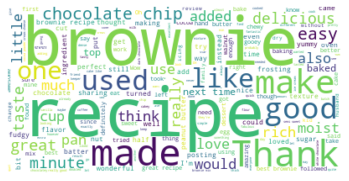

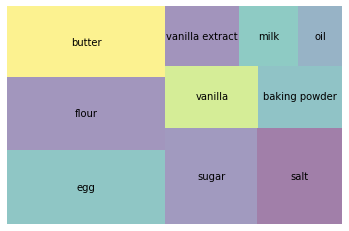

,name,id,overall_score,recipe_link
566,whatever floats your boat brownies,32204,5522.925065,https://www.food.com/recipe/32204
154748,perfect chocolate brownies,15072,1418.507021,https://www.food.com/recipe/15072
115389,kittencal s extreme chocolate brownies,87925,1119.968363,https://www.food.com/recipe/87925
199861,super peanut butter filled brownies,87864,689.682194,https://www.food.com/recipe/87864
109057,intensely chocolate cocoa brownies,118242,548.983287,https://www.food.com/recipe/118242


In [118]:
main()